In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

plt.style.use(['ggplot'])

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

<Figure size 432x288 with 0 Axes>

In [2]:
df = pd.read_csv('pisa2012_clean.csv')

In [3]:
df.head()

CNT  SUBNATIO  OECD         NC  SCHOOLID  STIDSTD  Grade  Gender  \
0  Australia    360000  OECD  Australia         1        6     10  Female   
1  Australia    360000  OECD  Australia         1        7     11  Female   
2  Australia    360000  OECD  Australia         1        8     10    Male   
3  Australia    360000  OECD  Australia         1        9     10    Male   
4  Australia    360000  OECD  Australia         1       14     10  Female   

   interest  motiv     snorm  efficacy  anxiety  self_concept  ESCS       MATH  
0      4.00   4.00  2.833333     4.000      1.2           3.4  0.78  625.96198  
1      1.25   3.00  2.000000     3.750      2.4           2.4  1.21  661.87100  
2      2.75   4.00  3.166667     4.000      1.4           3.0  0.96  639.35974  
3      3.25   4.00  4.000000     3.250      2.4           2.8  1.10  467.52608  
4      2.75   3.75  2.666667     3.125      1.6           3.2  1.10  589.35194

## Univariate Exploration

### 1) Math achievement

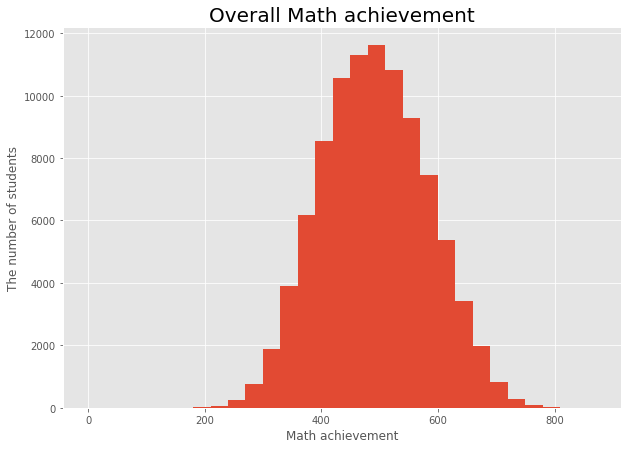

In [6]:
binsize = 30
bins = np.arange(0,df['MATH'].max()+binsize,binsize)

plt.figure(figsize=[10,7])
plt.hist(data=df, x='MATH',bins=bins)
plt.title('Overall Math achievement',size=20)
plt.xlabel('Math achievement')
plt.ylabel('The number of students')
plt.show()

### 2) Country

Text(0.5, 1.0, 'The number of students by Countries')

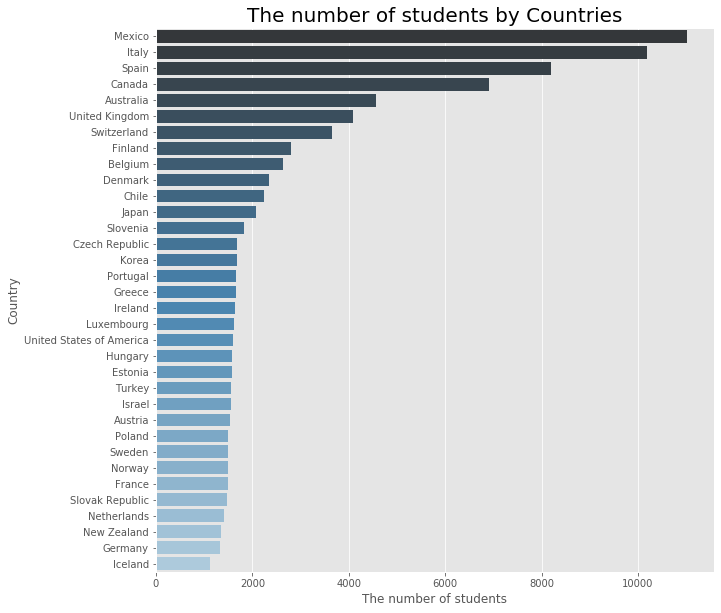

In [7]:
cnt_count = df['CNT'].value_counts(normalize=False)
plt.figure(figsize=[10,10])
sb.countplot(data=df, y='CNT',order=cnt_count.index,palette="Blues_d")
plt.ylabel('Country')
plt.xlabel('The number of students')
plt.title('The number of students by Countries',size=20)

### 3) Gender

Female    0.503394
Male      0.496606
Name: Gender, dtype: float64


Text(0.5, 1.0, 'The number of students by Gender')

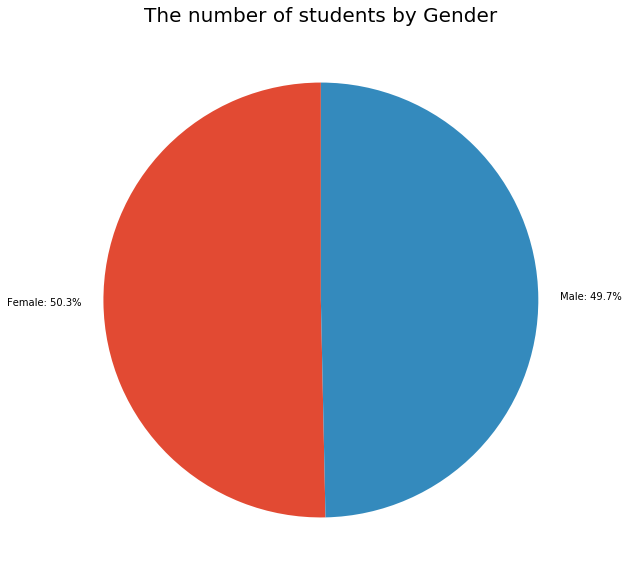

In [8]:
pisa_gen = df['Gender'].value_counts()
pisa_gen_prop=df['Gender'].value_counts(normalize=True)
print(pisa_gen_prop)

plt.figure(figsize=[10,10])
plt.pie(pisa_gen,labels=['Female: {:.1f}%'.format(100*pisa_gen_prop['Female']),
 'Male: {:.1f}%'.format(100*pisa_gen_prop['Male'])],startangle=90)
plt.title('The number of students by Gender',size=20)


### 4) Grade

Text(0.5, 1.0, 'The number of students by Grade')

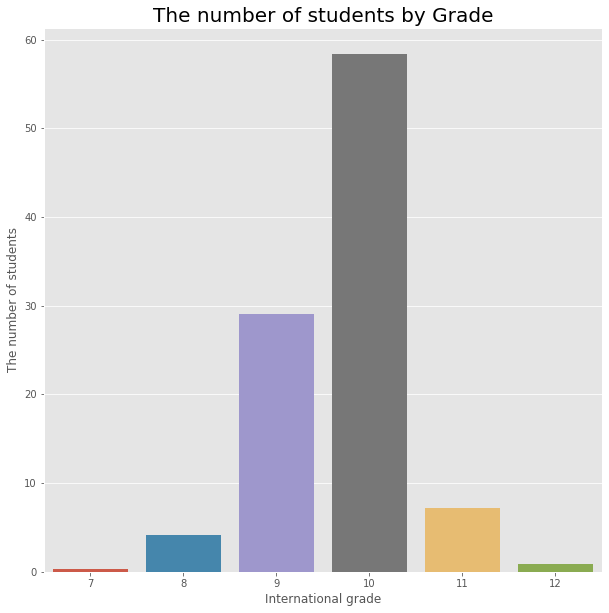

In [9]:
plt.figure(figsize=[10,10])
sb.barplot(data=df, x='Grade', y='Grade', estimator=lambda x: len(x)/len(df)*100)
plt.xlabel('International grade')
plt.ylabel('The number of students')
plt.title('The number of students by Grade',size=20)

### 5) ESCS

Text(0.5, 1.0, 'Distribution of ESCS')

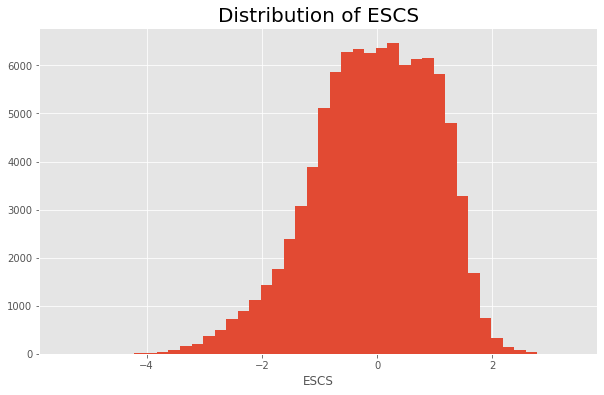

In [10]:
binsize=0.2
bins = np.arange(df['ESCS'].min()+binsize,df['ESCS'].max()+binsize,binsize)
plt.figure(figsize=[10,6])
plt.hist(data=df, x='ESCS',bins=bins)
plt.xlabel('ESCS')
plt.title('Distribution of ESCS',size=20)

### 6) Attributes

CNT  SUBNATIO  OECD         NC  SCHOOLID  STIDSTD  Grade  Gender  \
0  Australia    360000  OECD  Australia         1        6     10  Female   
1  Australia    360000  OECD  Australia         1        7     11  Female   
2  Australia    360000  OECD  Australia         1        8     10    Male   
3  Australia    360000  OECD  Australia         1        9     10    Male   
4  Australia    360000  OECD  Australia         1       14     10  Female   

   interest  motiv     snorm  efficacy  anxiety  self_concept  ESCS       MATH  
0      4.00   4.00  2.833333     4.000      1.2           3.4  0.78  625.96198  
1      1.25   3.00  2.000000     3.750      2.4           2.4  1.21  661.87100  
2      2.75   4.00  3.166667     4.000      1.4           3.0  0.96  639.35974  
3      3.25   4.00  4.000000     3.250      2.4           2.8  1.10  467.52608  
4      2.75   3.75  2.666667     3.125      1.6           3.2  1.10  589.35194

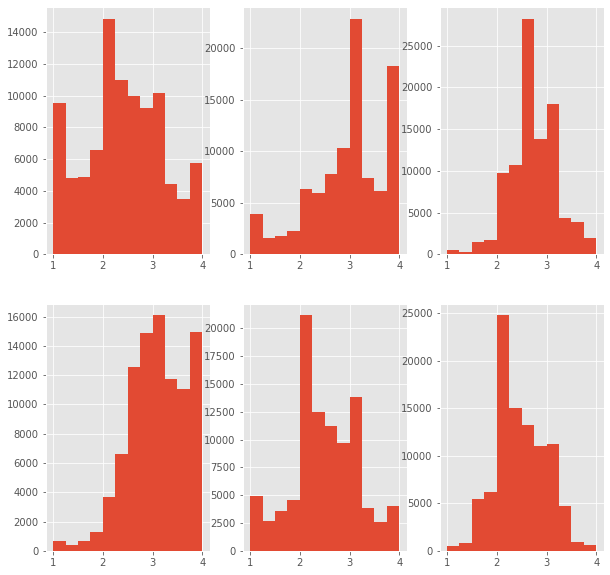

In [11]:
## Interest
## Instrumental motivation
## subjective norm
## math efficacy
## math anxiety
## math self-concept
varname = ['interest','motiv','snorm','efficacy','anxiety','self_concept']
binsize = [1/4, 1/4, 1/4, 1/4, 1/4, 1/4]

fig, ax = plt.subplots(nrows=2,ncols=3,figsize=[10,10])
ax = ax.flatten()
i = 0
for var in varname:
    bins = np.arange(df[var].min(), df[var].max()+binsize[i], binsize[i])
    ax[i].hist(data = df, x=var, bins=bins)
    i+=1
df.head()


## Bivariate Exploration

### 1) Math achievement

#### 1.1) By country

In [12]:
math_by_cnt = df.groupby('CNT')['MATH'].agg(['min','max','mean','std'])
math_by_cnt = math_by_cnt.sort_values('mean',ascending=False)

Text(0.5, 1.0, 'Average math achievement by Country')

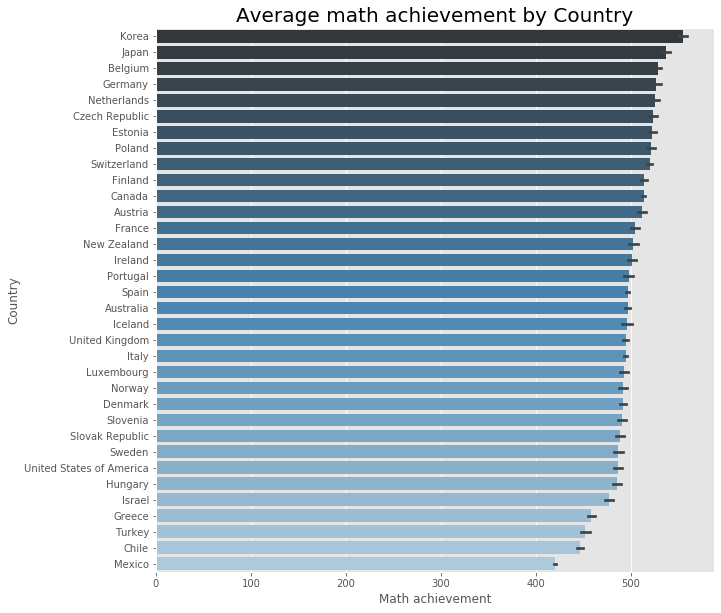

In [13]:
plt.figure(figsize=[10,10])
sb.barplot(data=df,y='CNT',x='MATH',order=math_by_cnt.index,palette="Blues_d")
plt.xlabel('Math achievement')
plt.ylabel('Country')
plt.title('Average math achievement by Country',size=20)

#### 1.2) By Gender

In [14]:
math_by_gen = df.groupby('Gender')['MATH'].agg(['min','max','mean','std'])
math_by_gen = math_by_gen.sort_values('mean',ascending=False)
math_by_gen

min        max        mean        std
Gender                                             
Male    158.83316  821.16374  500.327909  93.191146
Female  171.52984  848.34866  483.306834  87.819769

Text(0.5, 1.0, 'Bar plot')

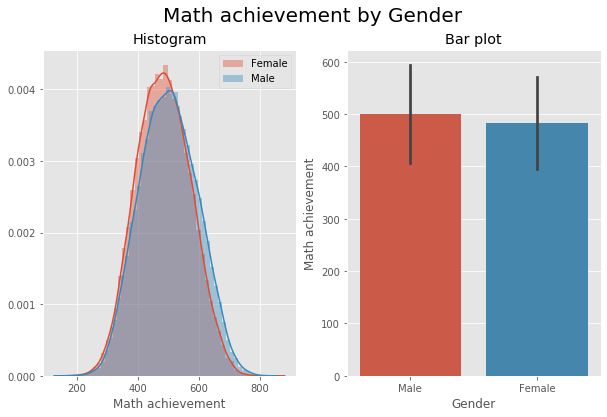

In [15]:
fig, ax = plt.subplots(1,2,sharey=False,figsize=[10,6])
fig.suptitle('Math achievement by Gender',size=20)
sb.distplot(df.query('Gender=="Female"')['MATH'],ax=ax[0],
            hist=True,label='Female')
sb.distplot(df.query('Gender=="Male"')['MATH'],ax=ax[0],
            hist=True,label='Male')
ax[0].legend()
ax[0].set_xlabel('Math achievement')
ax[0].set_title('Histogram')
sb.barplot(ax = ax[1],data=df,x='Gender',y='MATH',ci='sd',order=math_by_gen.index)
ax[1].set_ylabel('Math achievement')
ax[1].set_title('Bar plot')

#### 1.3) By Grade

In [16]:
math_by_grade = df.groupby('Grade')['MATH'].agg(['min','max','mean','std'])
math_by_grade

min        max        mean        std
Grade                                             
7      194.35270  552.66400  353.355781  61.054544
8      172.77612  723.40708  418.946073  82.265865
9      179.24130  784.55364  480.745103  89.940818
10     158.83316  848.34866  501.980874  88.663080
11     203.31048  804.26078  500.412118  89.530571
12     290.70728  747.86572  506.942428  86.576816

In [17]:
plt.figure(figsize=[10,6])
sb.barplot(data=df,x='Grade',y='MATH',ci='sd',palette='Blues_d')
plt.xlabel('International Grade')
plt.ylabel('Math achievement')
plt.title('Average Math achievement by Grade',size=20)

Text(0.5, 1.0, 'Average Math achievement by Grade')

#### 1.4) By ESCS

In [18]:
## correlation between ESCS and MATH
df[['ESCS','MATH']].corr().iloc[1,0]

0.4186841828825161

In [19]:
plt.figure(figsize=[10,6])
scat_escs = sb.scatterplot(data=df, x='ESCS',y='MATH',alpha=0.1)
scat_escs.text(x=-5,y=800,
               s='Correlation: {:.3f}'.format(df[['ESCS','MATH']].corr().iloc[1,0]),size=12)
plt.xlabel('Economic, Social and Cultural status(ESCS)')
plt.ylabel('Math achievement')
plt.title('Relation between ESCS and Math achievement')

Text(0.5, 1.0, 'Relation between ESCS and Math achievement')

#### 1.5) By attributes

In [20]:
varnames=['interest','motiv','snorm','efficacy','anxiety','self_concept']
varnames_full=['Math interest','Instrumental motivation','Subjective norm','Math efficacy',
              'Math anxiety','Math self-concept']

fig, ax = plt.subplots(2,3,sharey=False,figsize=[13,13])
ax = ax.flatten()
fig.suptitle('Relationship between attributes and Math',size=20)
for i in [0,1,2,3,4,5]:    
    print(varnames[i])
    ax[i].set_title(varnames_full[i]+"("+'r: {:.3f}'.format(df[[varnames[i],'MATH']].corr().iloc[1,0])+")")
    sb.regplot(data=df, x=varnames[i], y='MATH',ax=ax[i],x_jitter=0.3,scatter_kws={'alpha':1/100})
    ax[i].set_xlabel(varnames_full[i])
    ax[i].set_ylabel('Math achievement')

interest
motiv
snorm
efficacy
anxiety
self_concept


### 2) ESCS

#### 2.1) By country

In [21]:
escs_by_cnt = df.groupby(['CNT'])['ESCS'].agg(['min','max','mean','std']).sort_values('mean',ascending=False)
escs_by_cnt

min   max      mean       std
CNT                                                     
Iceland                  -2.05  2.87  0.790063  0.802528
Norway                   -4.68  2.60  0.485309  0.739171
Canada                   -5.32  3.13  0.405207  0.849944
Finland                  -3.88  2.45  0.363134  0.824674
Sweden                   -2.85  2.92  0.319832  0.795630
Denmark                  -3.11  2.66  0.286454  0.901887
United Kingdom           -3.00  2.37  0.255765  0.798328
Netherlands              -3.49  2.42  0.239232  0.803144
Germany                  -2.58  3.01  0.221497  0.913879
Belgium                  -2.96  2.71  0.193172  0.887124
Australia                -3.74  2.44  0.188533  0.819109
Israel                   -5.62  2.14  0.185311  0.853546
United States of America -3.80  2.60  0.181239  0.977738
Estonia                  -2.22  2.76  0.134454  0.826088
Austria                  -3.41  2.60  0.132067  0.844156
Ireland                  -3.32  2.51  0.131688  0.844405
Luxembourg               -2.84  3.21  0.123206  1.072526
Switzerland              -2.88  2.72  0.094791  0.880410
Czech Republic           -2.89  2.47  0.047949  0.782342
New Zealand              -2.51  1.90  0.046297  0.787234
Slovenia                 -3.15  2.42 -0.010371  0.851190
Korea                    -3.20  1.90 -0.011423  0.753885
Italy                    -4.23  2.70 -0.016750  0.954308
France                   -2.93  1.94 -0.023015  0.790699
Greece                   -2.76  3.27 -0.030422  0.979634
Japan                    -1.96  2.04 -0.095332  0.709122
Spain                    -3.29  2.73 -0.120695  1.000419
Slovak Republic          -3.57  2.24 -0.127761  0.895624
Chile                    -3.74  2.63 -0.168711  1.235380
Poland                   -2.71  2.38 -0.173854  0.932164
Hungary                  -3.19  2.45 -0.213893  0.951066
Portugal                 -3.07  2.67 -0.415261  1.160621
Mexico                   -4.61  2.55 -1.011518  1.254999
Turkey                   -4.61  1.50 -1.453857  1.113101

Text(0.5, 1.0, 'Economic, Social and Cultural status(ESCS) by Country')

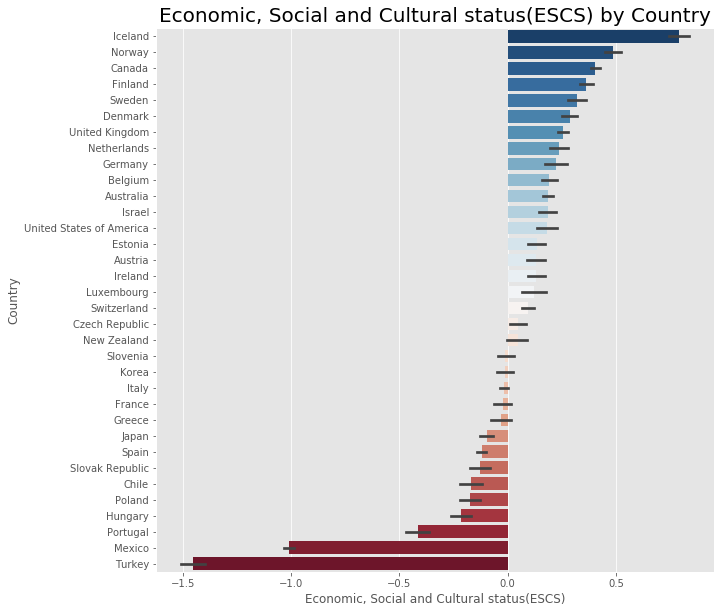

In [22]:
plt.figure(figsize=[10,10])
sb.barplot(data=df,y='CNT',x='ESCS',order=escs_by_cnt.index,palette="RdBu_r")
plt.xlabel('Economic, Social and Cultural status(ESCS)')
plt.ylabel('Country')
plt.title('Economic, Social and Cultural status(ESCS) by Country',size=20)

#### 2.2) By Gender

In [23]:
escs_by_gen = df.groupby('Gender')['ESCS'].agg(['min','max','mean','std'])
escs_by_gen = escs_by_gen.sort_values('mean',ascending=False)
escs_by_gen

min   max      mean       std
Gender                                
Male   -5.62  3.21 -0.035063  1.039899
Female -4.61  3.27 -0.075700  1.062338

Text(0, 0.5, 'ESCS')

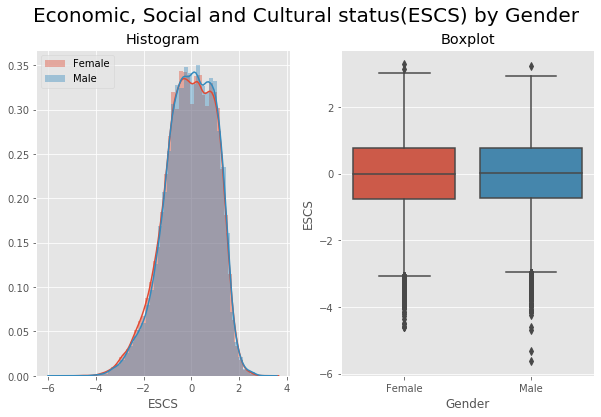

In [24]:
fig, ax = plt.subplots(1,2,sharey=False,figsize=[10,6])
fig.suptitle('Economic, Social and Cultural status(ESCS) by Gender',size=20)
sb.distplot(df.query('Gender=="Female"')['ESCS'],ax=ax[0],
            hist=True,label='Female')
sb.distplot(df.query('Gender=="Male"')['ESCS'],ax=ax[0],
            hist=True,label='Male')
ax[0].set_title('Histogram')
ax[0].legend()
ax[0].set_xlabel('ESCS')
sb.boxplot(ax = ax[1],data=df,x='Gender',y='ESCS')
ax[1].set_title('Boxplot')
ax[1].set_ylabel('ESCS')

#### 2.3) By Grade

In [25]:
escs_by_grade = df.groupby('Grade')['ESCS'].agg(['min','max','mean','std'])
escs_by_grade

min   max      mean       std
Grade                                
7     -4.60  1.59 -1.176188  1.061341
8     -4.36  2.66 -0.528920  1.074945
9     -5.62  3.21 -0.118788  1.053409
10    -5.32  3.27 -0.014658  1.055018
11    -3.80  2.70  0.157644  0.872264
12    -4.61  2.37  0.276076  0.866792

Text(0, 0.5, 'Economic, Social and Cultural status(ESCS)')

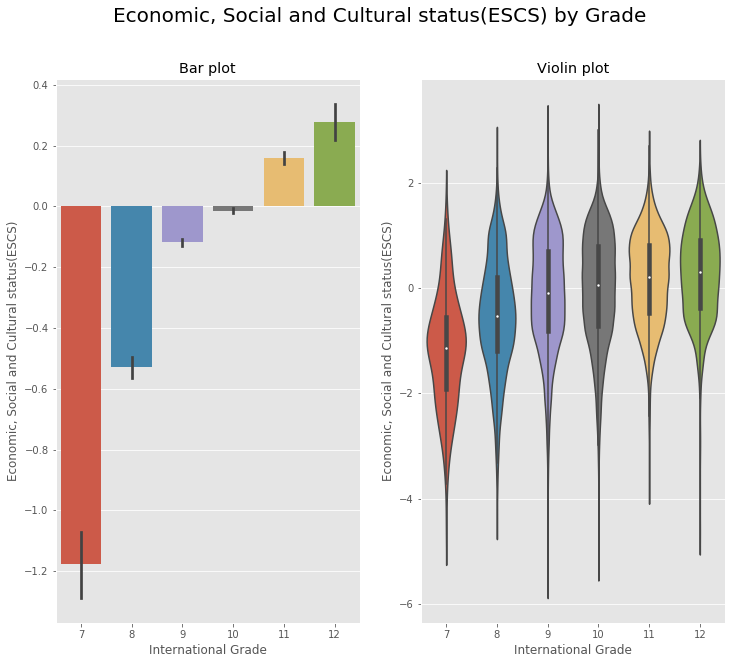

In [26]:
fig, ax = plt.subplots(1,2,sharey=False,figsize=[12,10])
fig.suptitle('Economic, Social and Cultural status(ESCS) by Grade',size=20)
sb.barplot(data=df,x='Grade',y='ESCS',ax = ax[0])
sb.violinplot(data=df, x='Grade',y='ESCS',ax=ax[1])
ax[0].set_title('Bar plot')
ax[0].set_xlabel('International Grade')
ax[0].set_ylabel('Economic, Social and Cultural status(ESCS)')
ax[1].set_title('Violin plot')
ax[1].set_xlabel('International Grade')
ax[1].set_ylabel('Economic, Social and Cultural status(ESCS)')



#### 2.4) By attributes



interest
motiv
snorm
efficacy
anxiety
self_concept


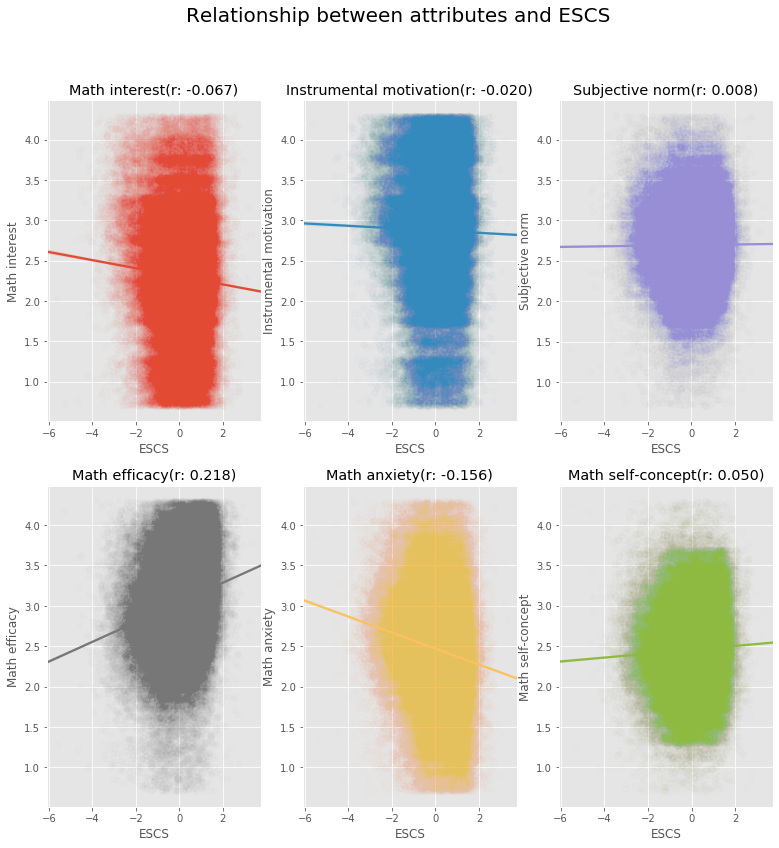

In [27]:
varnames=['interest','motiv','snorm','efficacy','anxiety','self_concept']
varnames_full=['Math interest','Instrumental motivation','Subjective norm','Math efficacy',
              'Math anxiety','Math self-concept']

fig, ax = plt.subplots(2,3,sharey=False,figsize=[13,13])
ax = ax.flatten()
fig.suptitle('Relationship between attributes and ESCS',size=20)
for i in [0,1,2,3,4,5]:    
    print(varnames[i])
    ax[i].set_title(varnames_full[i]+"("+'r: {:.3f}'.format(df[[varnames[i],'ESCS']].corr().iloc[1,0])+")")
    sb.regplot(data=df, y=varnames[i], x='ESCS',ax=ax[i],y_jitter=0.3,scatter_kws={'alpha':1/100})
    ax[i].set_ylabel(varnames_full[i])
    ax[i].set_xlabel('ESCS')

## Mulvariate Exploration

### 1. Math achievement 

#### 1.1) By gender and country

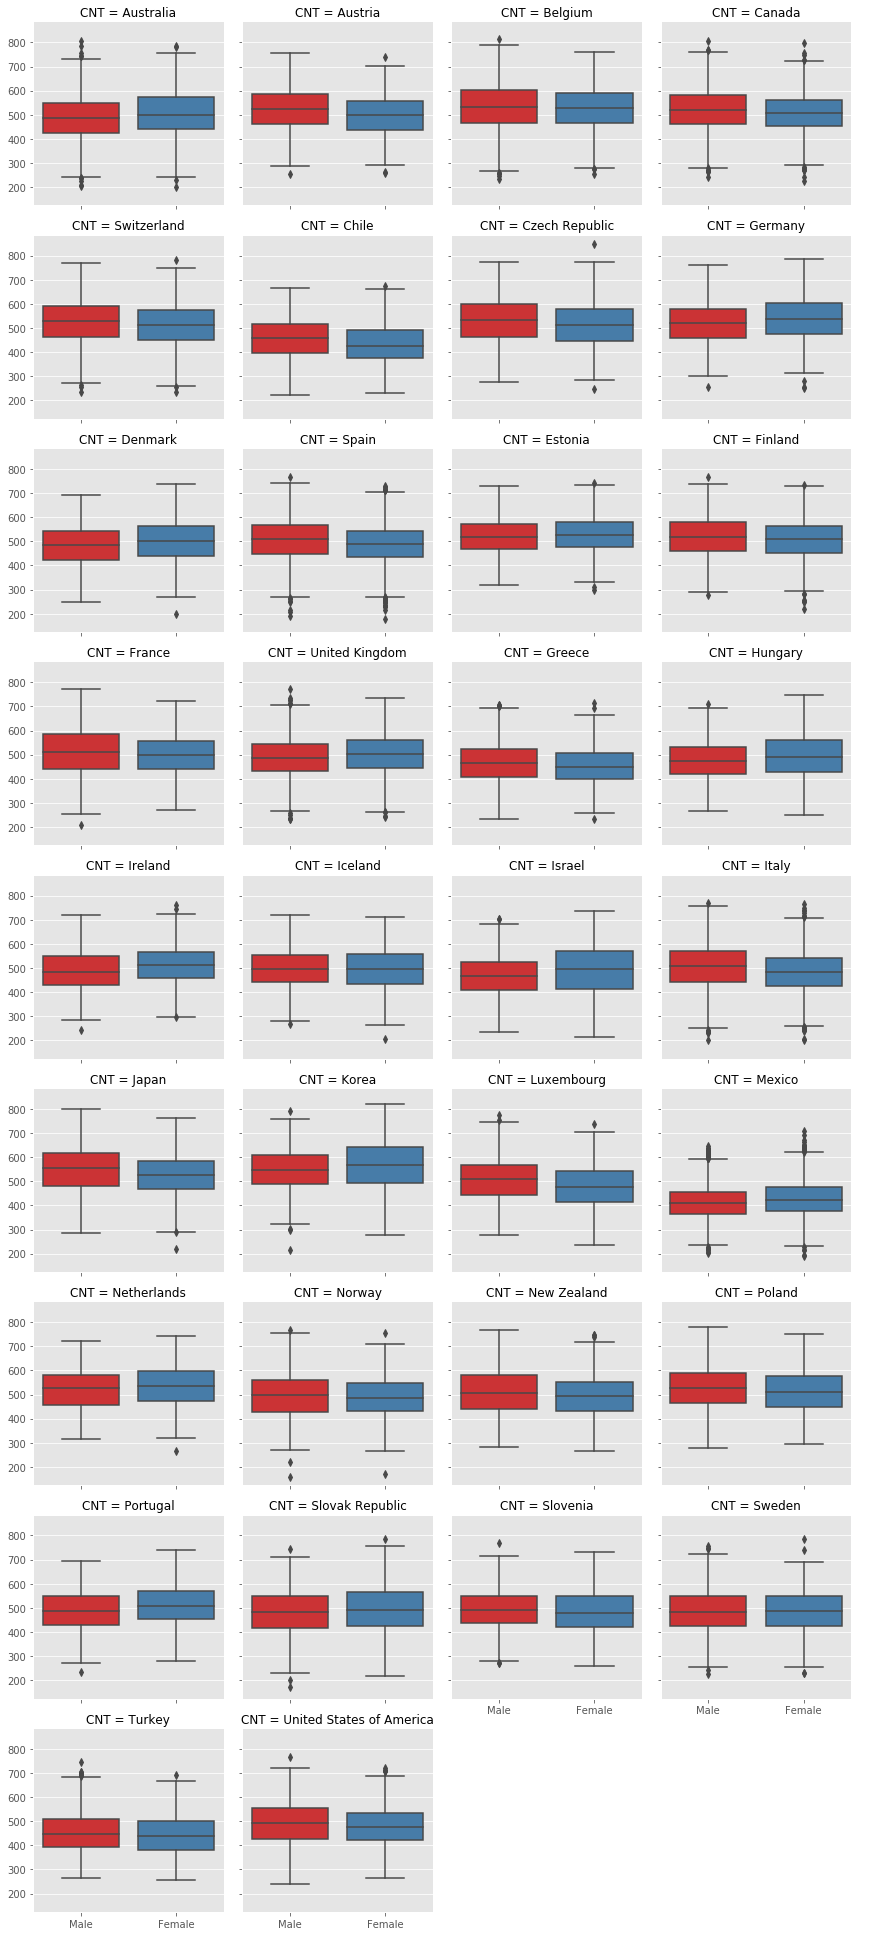

In [28]:
g = sb.FacetGrid(df, col='CNT',col_wrap = 4)
#g = g.map_dataframe(sb.stripplot,x='Gender', y='MATH', alpha=0.01)
g = g.map_dataframe(sb.boxplot,x='Gender',y='MATH',palette='Set1')
g.add_legend()

#### 1-2)  By gender and international grade

In [29]:
g = sb.FacetGrid(df, col='Grade',col_wrap = 3)
#g = g.map_dataframe(sb.stripplot,x='Gender', y='MATH', alpha=0.01)
g = g.map_dataframe(sb.boxplot,x='Gender',y='MATH',palette='Set1')


#### 1-3) Relationship between ESCS and Math by Grade 

Text(0.5, 1, 'Relationship between ESCS and Math achievement by Grade')

<Figure size 720x720 with 0 Axes>

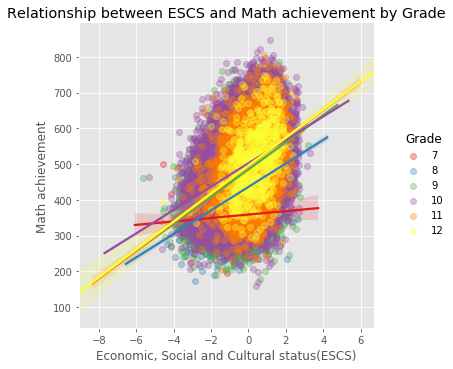

In [30]:
plt.figure(figsize=[10,10])
sb.lmplot(data=df, y='MATH',x='ESCS',hue='Grade',scatter_kws={'alpha':1/3},palette="Set1")
plt.xlabel('Economic, Social and Cultural status(ESCS)')
plt.ylabel('Math achievement')
plt.title('Relationship between ESCS and Math achievement by Grade')

#### 1-3) Relationship between attributes and Math by Grade 

In [44]:
df_melt = pd.melt(df[['Grade','interest','motiv','snorm','efficacy','anxiety','self_concept','MATH']],
        id_vars=['Grade','MATH'])
df_melt.head()

Grade       MATH      variable     value
0          10  625.96198      interest  4.000000
1          11  661.87100      interest  1.250000
2          10  639.35974      interest  2.750000
3          10  467.52608      interest  3.250000
4          10  589.35194      interest  2.750000
5          10  524.07694      interest  2.000000
6          10  494.78890      interest  3.500000
7          10  580.16046      interest  2.500000
8          10  428.11184      interest  1.333333
9          10  459.58090      interest  1.750000
10         11  417.90778      interest  1.250000
11         10  666.85620      interest  3.000000
12         10  660.54682      interest  2.000000
13         10  540.82412      interest  1.000000
14         10  726.60072      interest  3.000000
15          9  657.66474      interest  3.500000
16         10  619.65260      interest  2.750000
17         10  531.71056      interest  3.250000
18         10  573.69528      interest  3.250000
19         10  477.96386      interest  1.000000
20         10  464.87772      interest  2.000000
21         10  338.84562      interest  2.500000
22         10  357.77380      interest  2.000000
23         10  331.21202      interest  2.000000
24         10  498.60574      interest  1.000000
25         11  534.51470      interest  2.000000
26         10  459.50302      interest  2.000000
27         10  516.28756      interest  1.000000
28         10  428.96868      interest  2.000000
29         10  420.94564      interest  2.250000
...       ...        ...           ...       ...
567390     10  547.28930  self_concept  2.400000
567391     10  424.76240  self_concept  2.400000
567392     11  547.67876  self_concept  2.400000
567393     10  430.37078  self_concept  2.400000
567394     10  428.42344  self_concept  2.400000
567395     10  357.15064  self_concept  2.400000
567396     10  489.18054  self_concept  2.200000
567397     10  517.37808  self_concept  2.400000
567398     10  580.93940  self_concept  3.000000
567399     10  535.21576  self_concept  2.000000
567400     10  537.70838  self_concept  2.600000
567401     10  707.67254  self_concept  2.800000
567402      9  481.85854  self_concept  2.200000
567403     10  485.28588  self_concept  2.600000
567404     10  622.61256  self_concept  3.200000
567405     10  519.71488  self_concept  2.800000
567406     10  608.98114  self_concept  2.600000
567407      8  458.17886  self_concept  3.400000
567408     10  457.24414  self_concept  2.800000
567409     10  420.32250  self_concept  2.400000
567410     10  453.66100  self_concept  2.200000
567411     10  474.77020  self_concept  2.800000
567412     10  689.52328  self_concept  3.200000
567413     10  540.20098  self_concept  2.400000
567414     10  523.22014  self_concept  2.000000
567415     10  676.59292  self_concept  3.000000
567416     10  489.41424  self_concept  2.600000
567417      9  421.49090  self_concept  2.200000
567418      9  403.41952  self_concept  2.800000
567419      9  354.34646  self_concept  2.400000

[567420 rows x 4 columns]

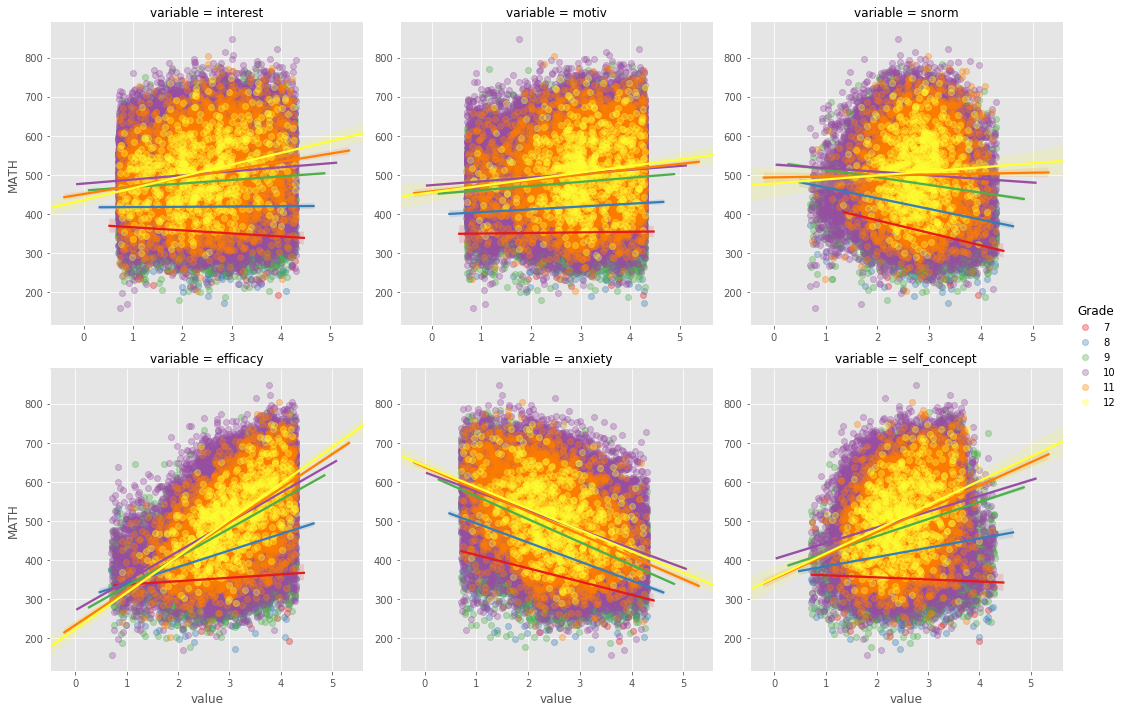

In [53]:
sb.lmplot(data=df_melt, x='value', y="MATH", hue="Grade", col='variable',
         scatter_kws={'alpha':1/3},palette="Set1",col_wrap = 3, 
         sharey=False, sharex=False, x_jitter=0.3)

### 2. ESCS

#### 2.1) By Gender and country

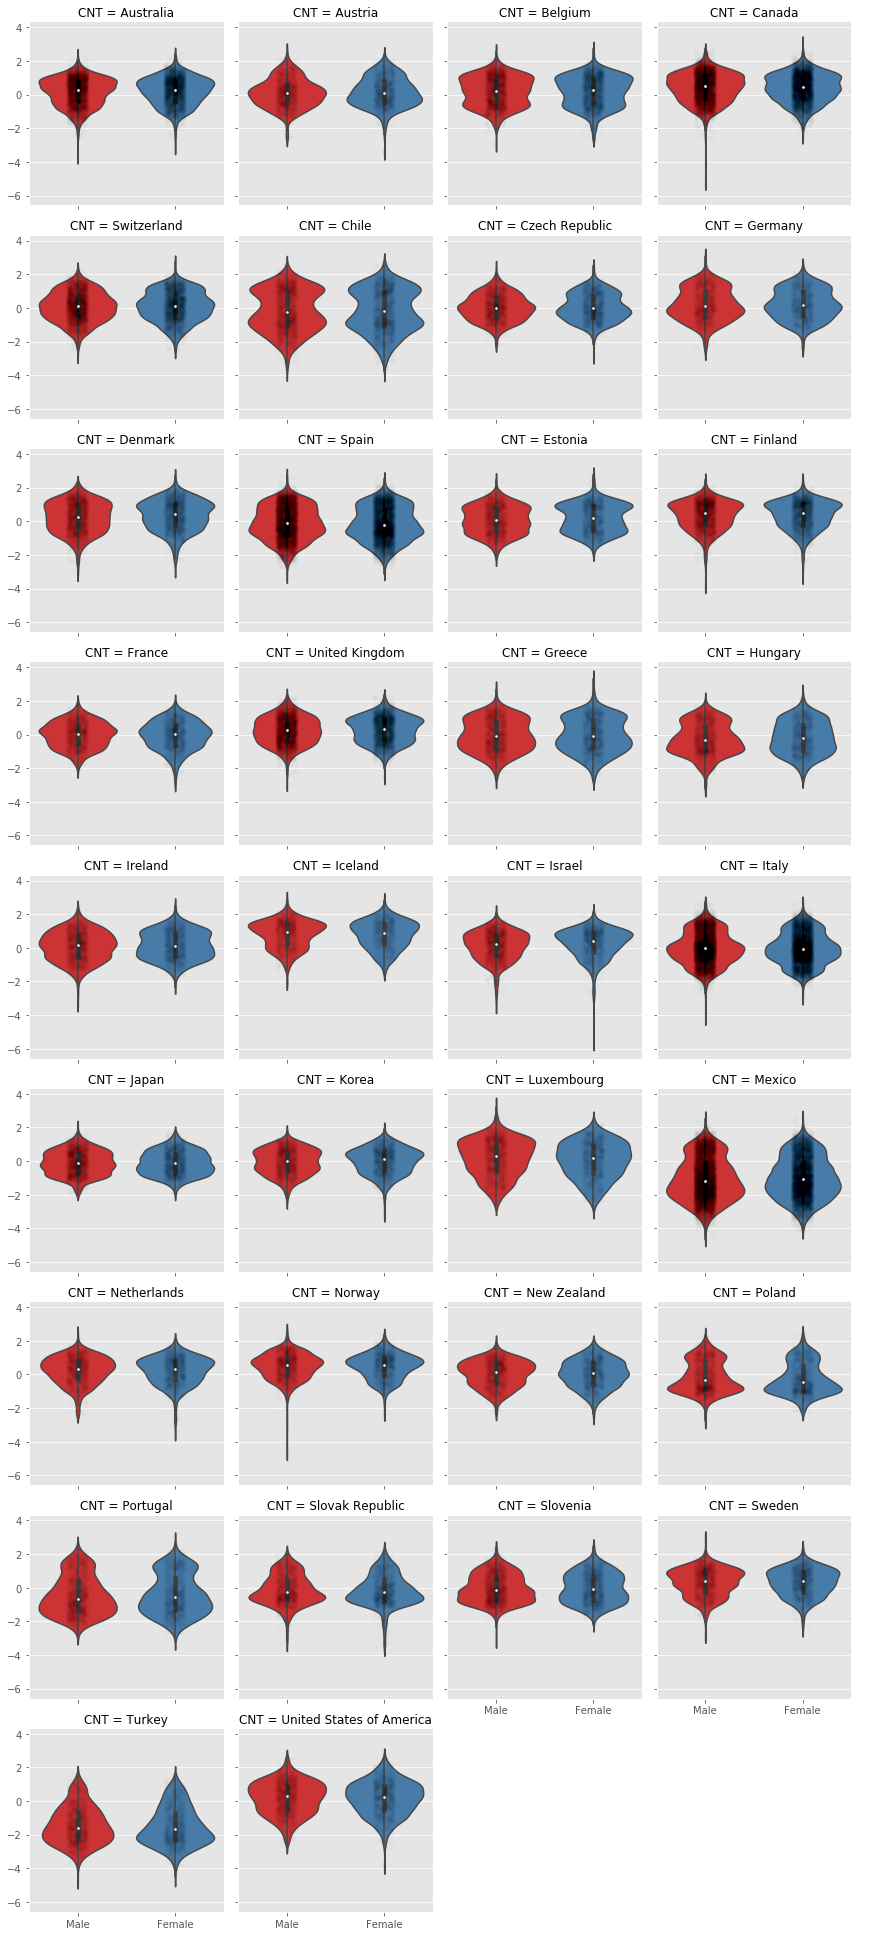

In [61]:
g = sb.FacetGrid(df, col='CNT',col_wrap = 4)
#g = g.map_dataframe(sb.stripplot,x='Gender', y='ESCS', alpha=0.01, palette=['black','black'])
g = g.map_dataframe(sb.violinplot,x='Gender',y='ESCS',palette='Set1')
g.add_legend()

#### 2.2) By gender and international grade

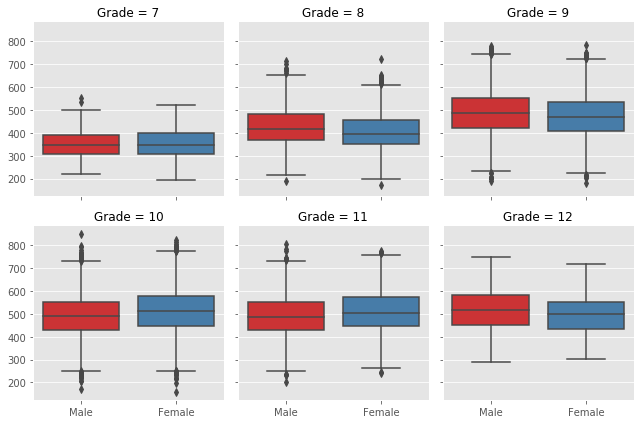

In [58]:
g = sb.FacetGrid(df, col='Grade',col_wrap = 3)
#g = g.map_dataframe(sb.stripplot,x='Gender', y='MATH', alpha=0.01)
g = g.map_dataframe(sb.boxplot,x='Gender',y='MATH',palette='Set1')

#### 2.3) Relationship between ESCS and attributes by Grade

In [62]:
df_melt2 = pd.melt(df[['Grade','interest','motiv','snorm','efficacy','anxiety','self_concept','ESCS']],
        id_vars=['Grade','ESCS'])
df_melt2.head()

Grade  ESCS  variable  value
0     10  0.78  interest   4.00
1     11  1.21  interest   1.25
2     10  0.96  interest   2.75
3     10  1.10  interest   3.25
4     10  1.10  interest   2.75

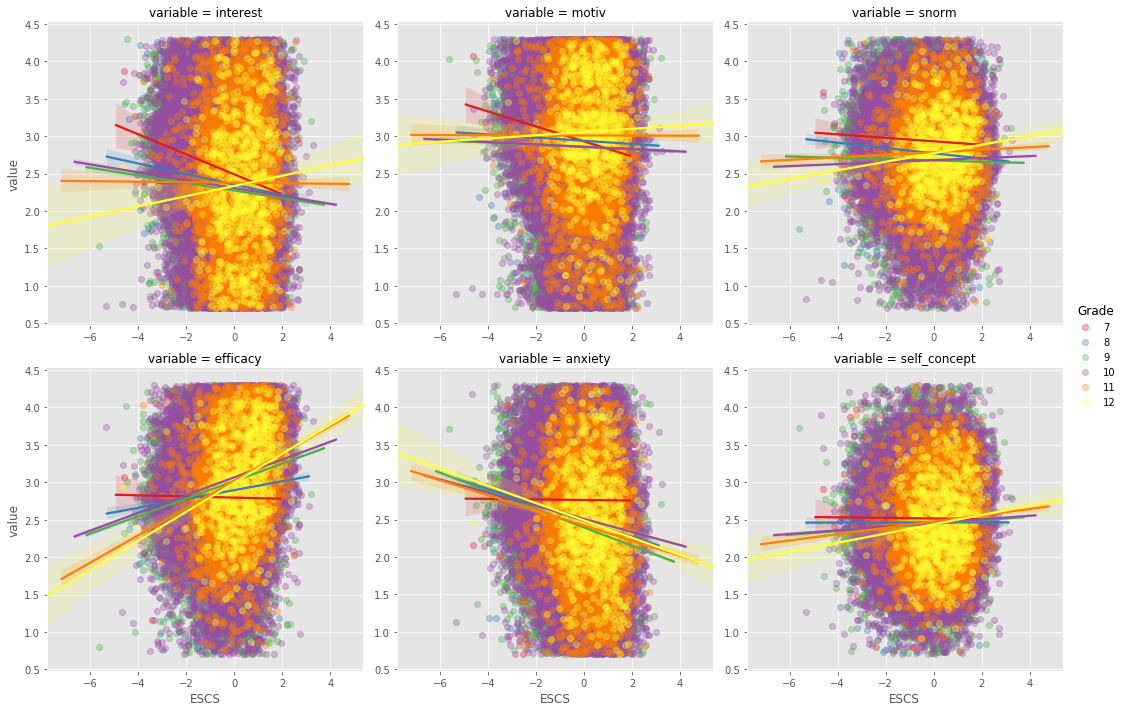

In [65]:
sb.lmplot(data=df_melt2, x='ESCS', y="value", hue="Grade", col='variable',
         scatter_kws={'alpha':1/3},palette="Set1",col_wrap = 3, 
         sharey=False, sharex=False, y_jitter=0.3)

### 3. Attributes

#### 3.1) By gender and country

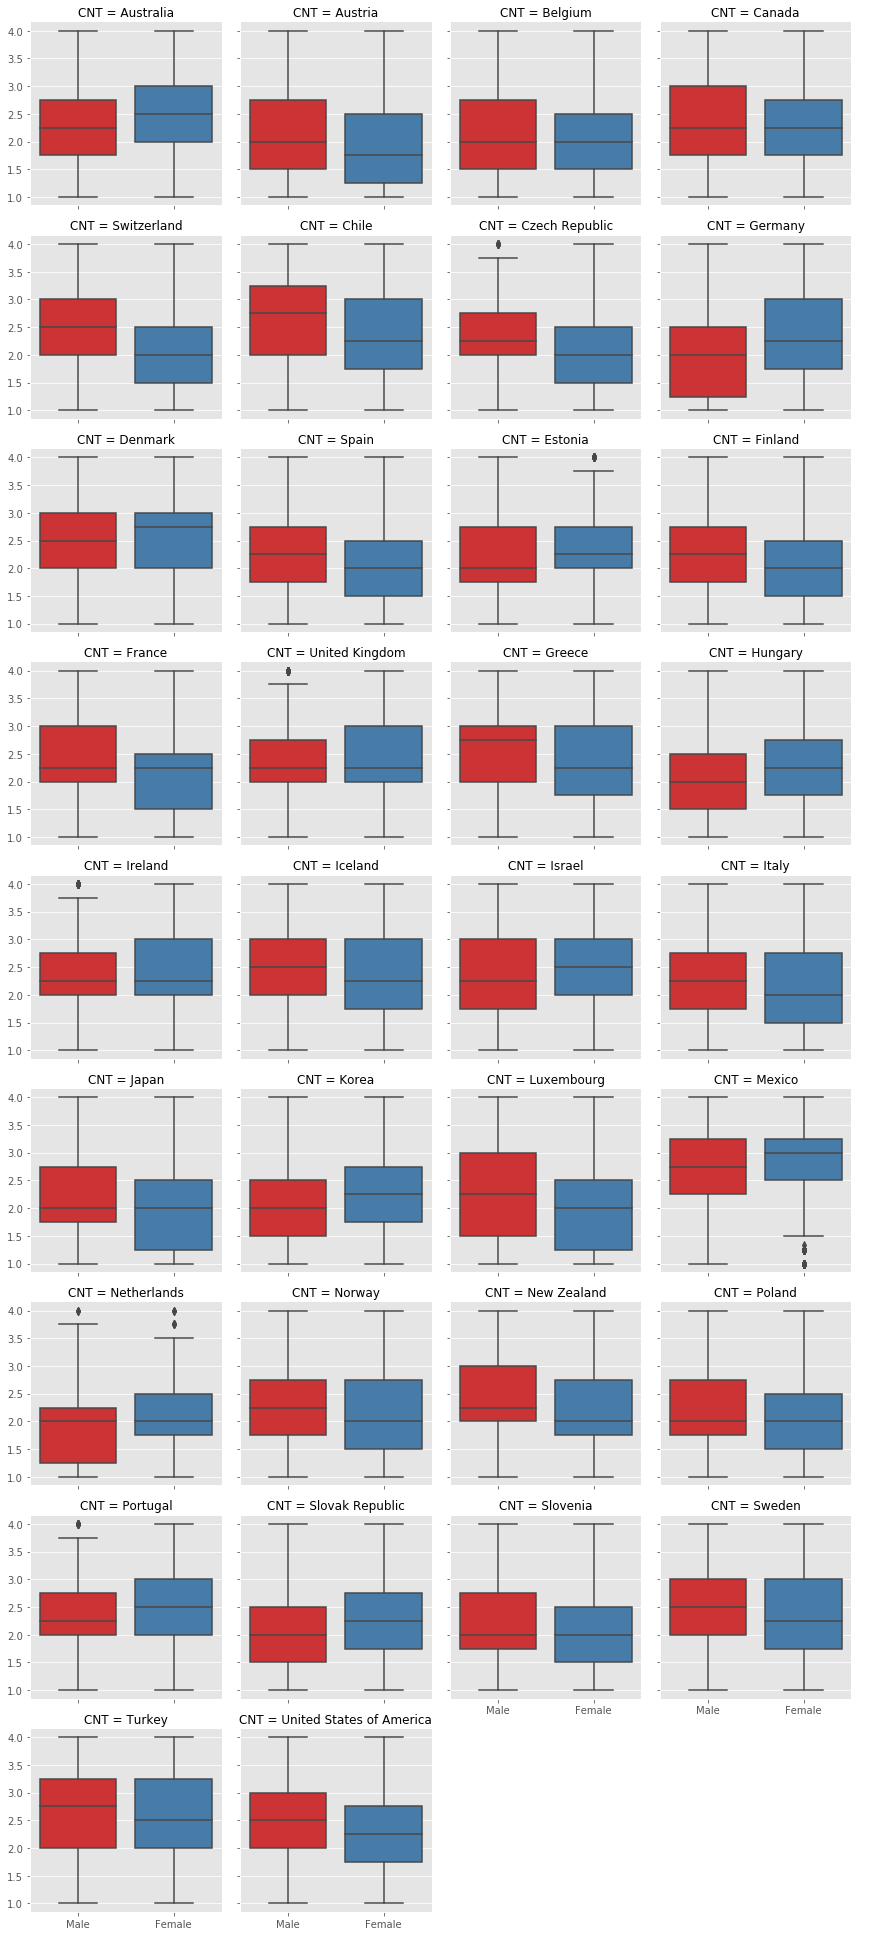

In [67]:
g = sb.FacetGrid(df, col='CNT',col_wrap = 4)
#g = g.map_dataframe(sb.stripplot,x='Gender', y='ESCS', alpha=0.01, palette=['black','black'])
g = g.map_dataframe(sb.boxplot,x='Gender',y='interest',palette='Set1')
g.add_legend()